In [92]:
import pandas as pd

In [93]:
df=pd.read_csv("time.csv")

In [94]:
df.columns=df.columns.map(lambda x: x.replace("(s)","(speedup)"))
df.columns
df.head()

,Size(n),Seq(speedup),Doacross(speedup),SIMD(speedup),wave(speedup)
0,10,0.019,0.010,0.002,0.055
1,16,0.117,0.078,0.010,0.102
2,20,0.216,0.076,0.018,0.138
3,25,0.442,0.156,0.032,0.243
4,32,0.968,0.339,0.062,0.509


In [95]:
for y in df.columns :
    if y!="Size(n)" and y!="Seq(speedup)":
       df[y]=df.apply(lambda x: round(x["Seq(speedup)"]/x[y],2),axis=1)

In [96]:
df.drop("Seq(speedup)",axis=1,inplace=True)
df.to_csv("speedup.csv",index=False)
df

,Size(n),Doacross(speedup),SIMD(speedup),wave(speedup)
0,10,1.90,9.50,0.35
1,16,1.50,11.70,1.15
2,20,2.84,12.00,1.57
3,25,2.83,13.81,1.82
4,32,2.86,15.61,1.90
5,37,2.43,18.07,1.66
6,40,2.72,16.76,2.13
7,45,2.72,19.44,2.20
8,50,2.83,44.87,2.18
9,64,2.66,20.25,2.13


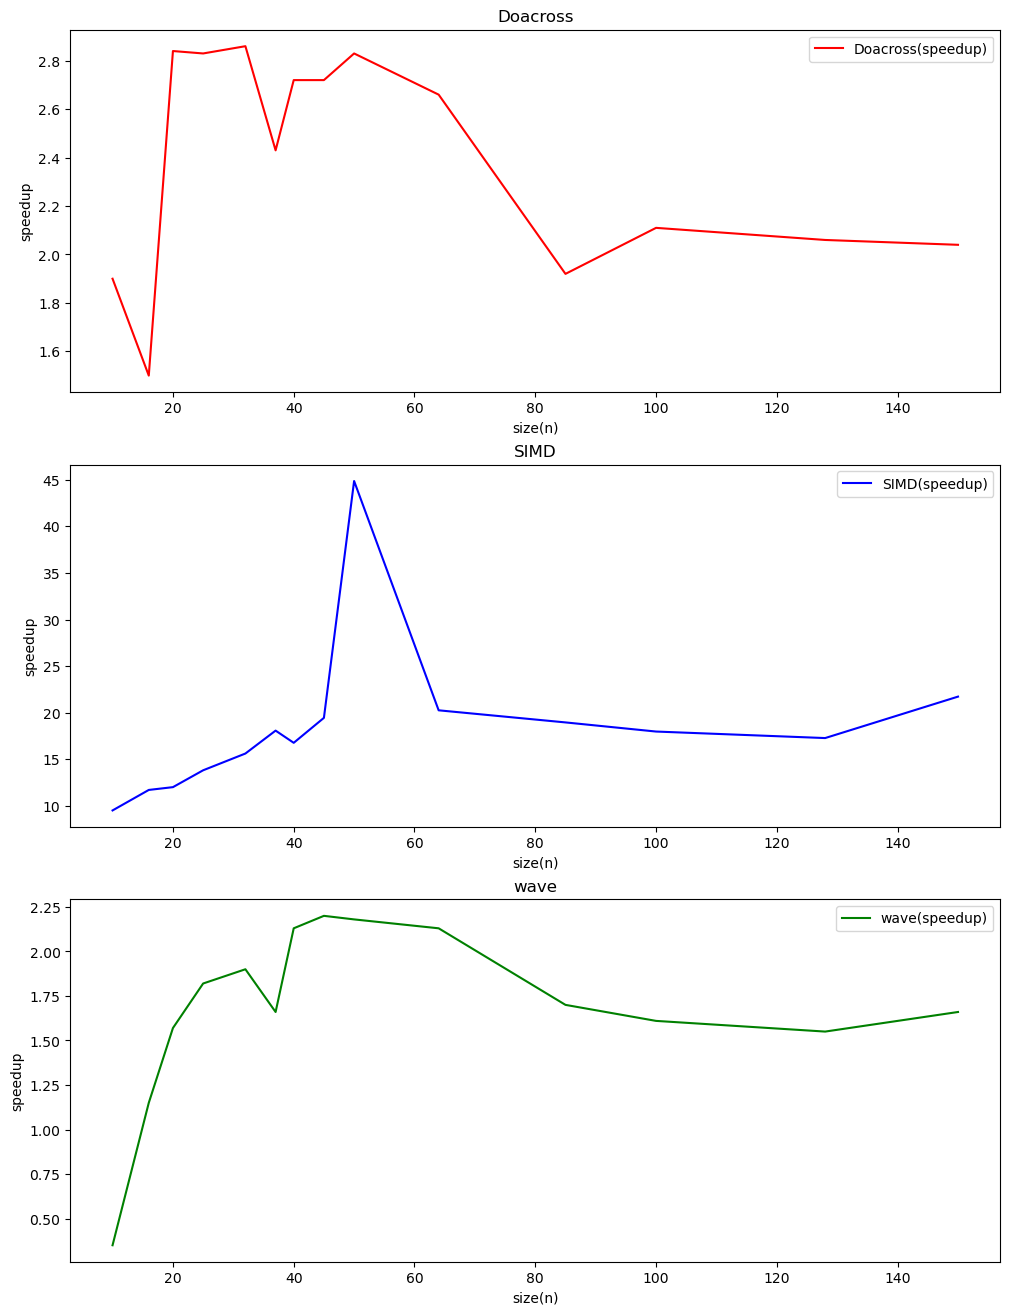

In [97]:
from matplotlib import pyplot as plt
colors = ['red', 'blue', 'green', 'orange', 'purple']
fig, axes=plt.subplots(3,1,figsize=(12,16))
z=0 
x="Size(n)"
for y in df.columns :
    if y!="Size(n)":
        axes[z].plot(df[x], df[y],label=y,color=colors[z])
        axes[z].set_title(f"{y.replace('(speedup)','')}")
        axes[z].set_xlabel("size(n)")
        axes[z].set_ylabel("speedup")
        axes[z].legend()
        z+=1
plt.savefig("speedup_graph.jpg")
plt.show()

In [98]:
df=pd.read_csv("time.csv")

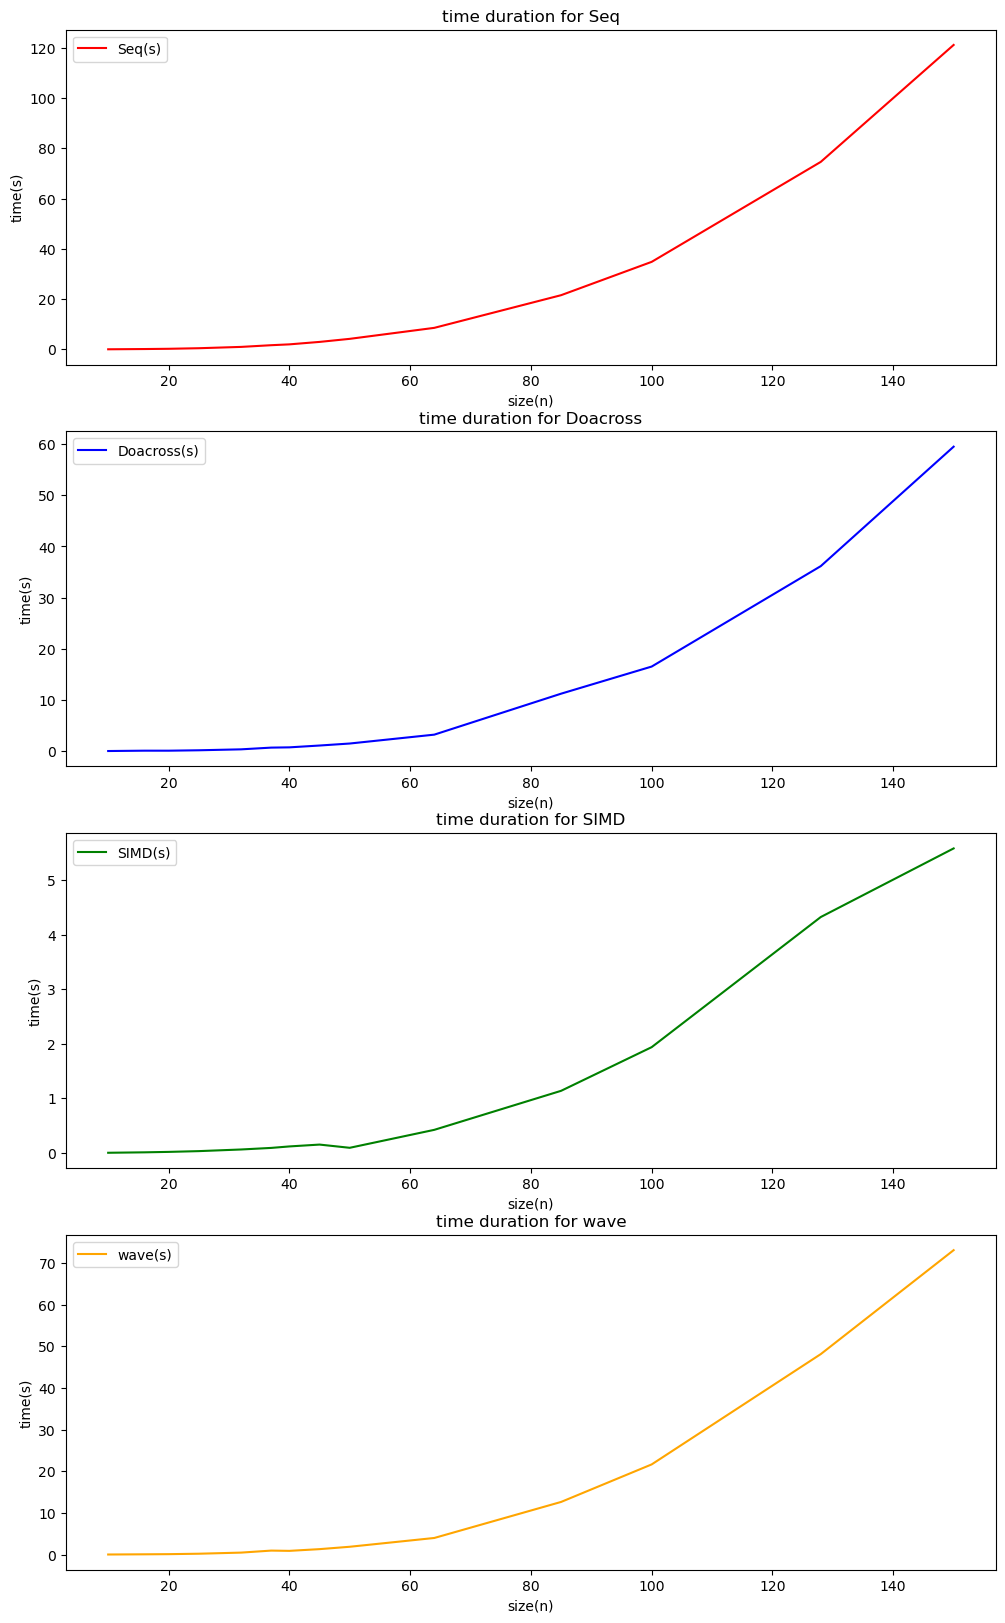

In [99]:
fig, axes=plt.subplots(4,1,figsize=(12,20))
z=0 
x="Size(n)"
for y in df.columns :
    if y!="Size(n)":
        axes[z].plot(df[x], df[y],label=y,color=colors[z])
        axes[z].set_title(f"time duration for {y.replace('(s)','')}")
        axes[z].set_xlabel("size(n)")
        axes[z].set_ylabel("time(s)")
        axes[z].legend()
        z+=1
plt.savefig("time_graph.jpg")
plt.show()